In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from pathlib import Path
from google.colab import files





In [9]:
# Upload files manually via Colab upload prompt
from google.colab import files
uploaded = files.upload()

Saving new_ukr1.csv to new_ukr1 (1).csv


In [10]:
data = pd.read_csv('new_ukr1.csv')
data.shape

(58501, 19)

In [24]:


# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le

# Split data into features and target
target = 'final_outcome_group'
X = data.drop(columns=[target])
y = data[target]

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log_reg))

log_reg_coefficients = log_reg.coef_[0]

# Create DataFrame
log_reg_coef_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': log_reg_coefficients
})

print("Logistic Regression Coefficients:")
print(log_reg_coef_df)

# Logistic Regression with LASSO
log_reg_lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
param_grid_lasso = {'C': [0.01, 0.1, 1, 10, 100]}
lasso_cv = GridSearchCV(log_reg_lasso, param_grid_lasso, cv=5, scoring='accuracy')
lasso_cv.fit(X_train, y_train)
y_pred_lasso = lasso_cv.best_estimator_.predict(X_test)
print("Logistic Regression with LASSO Report:\n", classification_report(y_test, y_pred_lasso))



Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     10522
           1       0.69      0.06      0.11      1179

    accuracy                           0.90     11701
   macro avg       0.80      0.53      0.53     11701
weighted avg       0.88      0.90      0.86     11701

Logistic Regression Coefficients:
                     Feature  Coefficient
0                        Sex     0.142081
1                        Age    -0.029597
2                Urban.Rural     0.053406
3               Localization    -0.018553
4                    hiv_def     0.585306
5    Cotrimoxazole.treatment    -0.007881
6   Has.started.to.take.ART.    -0.525560
7                 Cavitation     0.073383
8              Alcohol.abuse     0.172889
9        Injecting.drug.user     0.013130
10                  Homeless     0.241544
11                Unemployed     0.143599
12         Healthcare.worker    -0.199847
13                  Pr

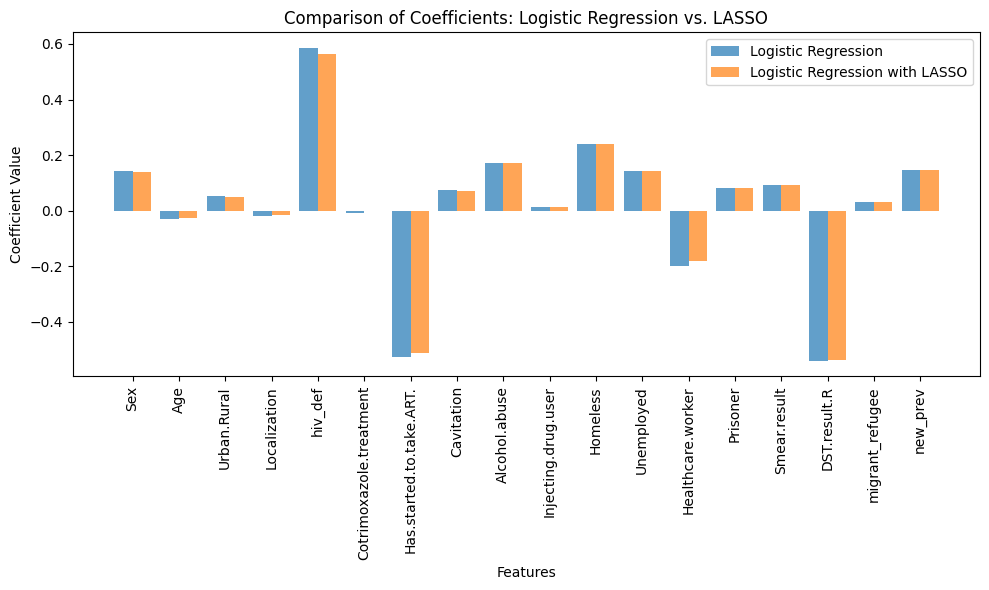

Encoding for column: Sex
{'Female': 0, 'Male': 1}

Encoding for column: Urban.Rural
{'Rural': 0, 'Urban': 1}

Encoding for column: Localization
{'Both': 0, 'Extra-pulmonary': 1, 'Pulmonary': 2}

Encoding for column: hiv_def
{'Negative': 0, 'Positive': 1}

Encoding for column: Cavitation
{'No': 0, 'Yes': 1}

Encoding for column: Alcohol.abuse
{'No': 0, 'Yes': 1}

Encoding for column: Injecting.drug.user
{'No': 0, 'Yes': 1}

Encoding for column: Homeless
{'No': 0, 'Yes': 1}

Encoding for column: Unemployed
{'No': 0, 'Yes': 1}

Encoding for column: Healthcare.worker
{'No': 0, 'Yes': 1}

Encoding for column: Prisoner
{'No': 0, 'Yes': 1}

Encoding for column: Smear.result
{'Negative': 0, 'Positive': 1}

Encoding for column: DST.result.R
{'Resistant': 0, 'Sensitive': 1}

Encoding for column: migrant_refugee
{'No': 0, 'Yes': 1}

Encoding for column: new_prev
{'New': 0, 'Previously treated': 1}

Encoding for column: final_outcome_group
{'Cure or Treatment Completion': 0, 'Treatment discontinua

In [12]:
#plots:

import matplotlib.pyplot as plt
import numpy as np

# Get coefficients from logistic regression
log_reg_coefficients = log_reg.coef_[0]

# Get coefficients from the best LASSO model
lasso_coefficients = lasso_cv.best_estimator_.coef_[0]

# Create a bar plot for comparison
feature_names = data.drop(columns=[target]).columns
x = np.arange(len(feature_names))

plt.figure(figsize=(10, 6))

# Plot Logistic Regression coefficients
plt.bar(x - 0.2, log_reg_coefficients, width=0.4, label='Logistic Regression', alpha=0.7)

# Plot LASSO coefficients
plt.bar(x + 0.2, lasso_coefficients, width=0.4, label='Logistic Regression with LASSO', alpha=0.7)

# Add labels and legend
plt.xticks(ticks=x, labels=feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Coefficients: Logistic Regression vs. LASSO')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

for column, le in label_encoders.items():
    print(f"Encoding for column: {column}")
    print(dict(zip(le.classes_, le.transform(le.classes_))))
    print()


In [23]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)


In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
rf_cv = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
rf_cv.fit(X_train, y_train)
y_pred_rf = rf_cv.best_estimator_.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

# LightGBM
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_test = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

param_grid_lgb = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200]
}

lgbm = lgb.LGBMClassifier(random_state=42)
lgb_cv = GridSearchCV(lgbm, param_grid_lgb, cv=5, scoring='accuracy')
lgb_cv.fit(X_train, y_train)
y_pred_lgb = lgb_cv.best_estimator_.predict(X_test)
print("LightGBM Report:\n", classification_report(y_test, y_pred_lgb))


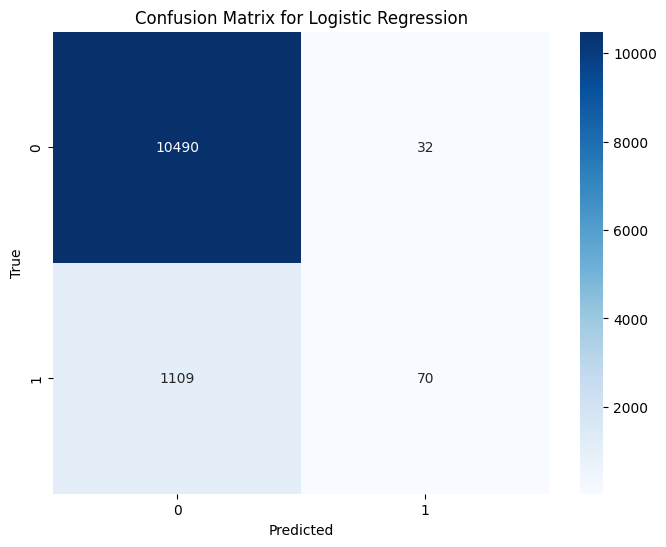

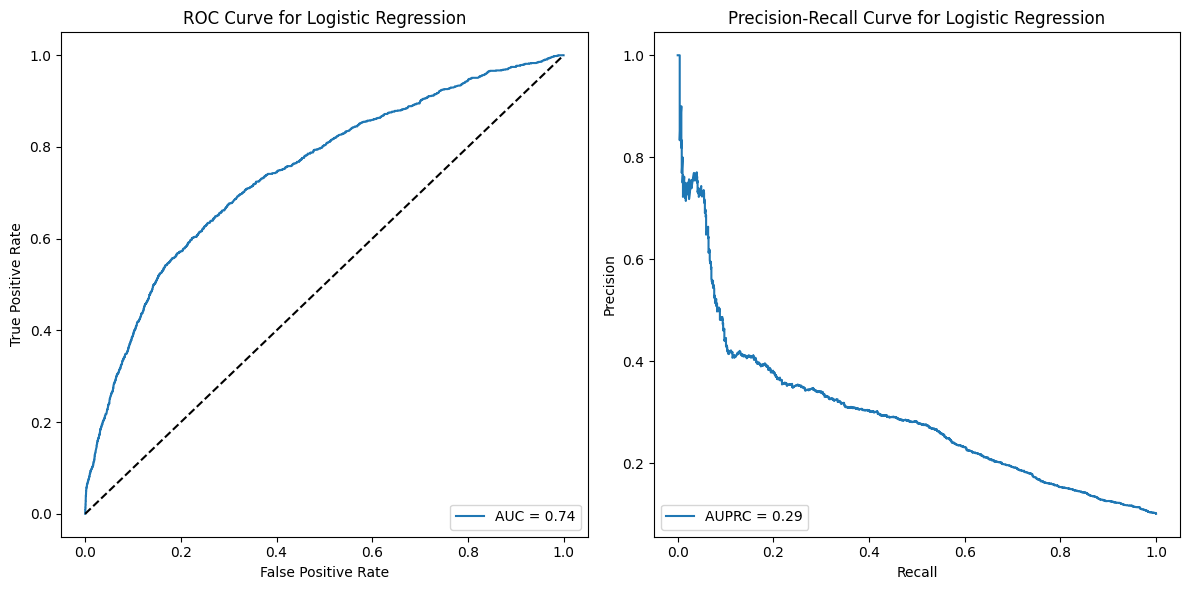

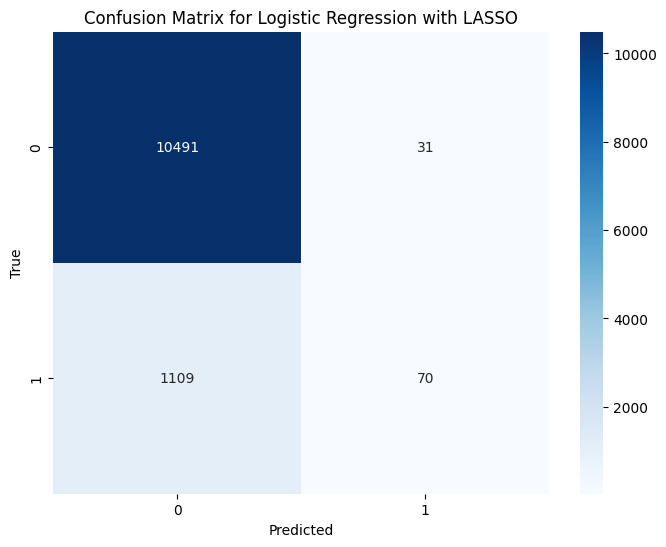

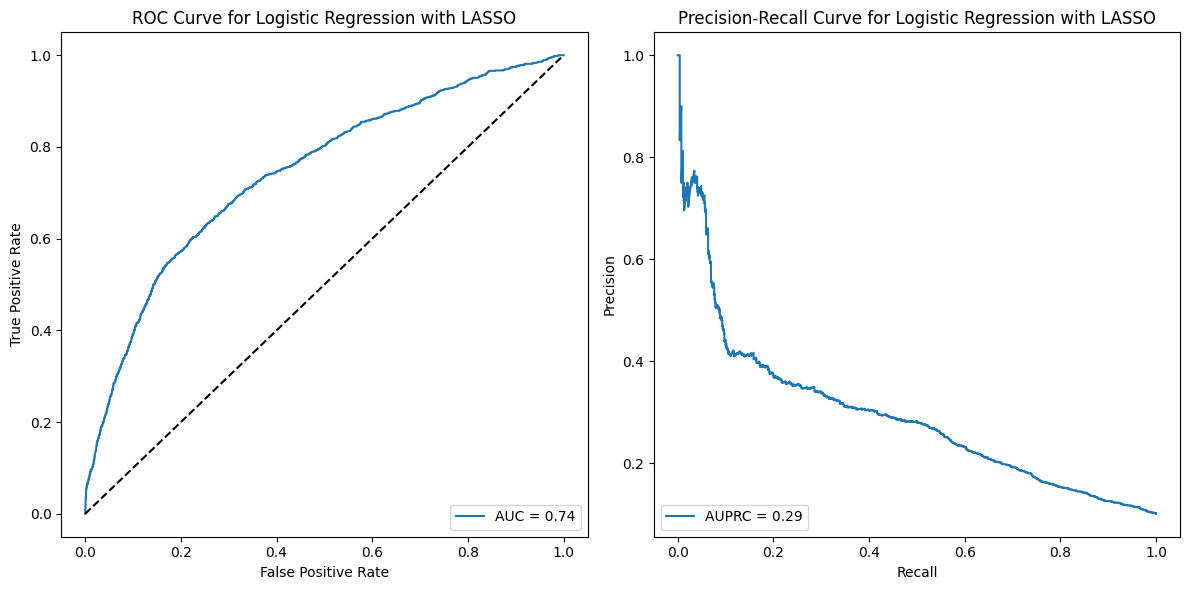

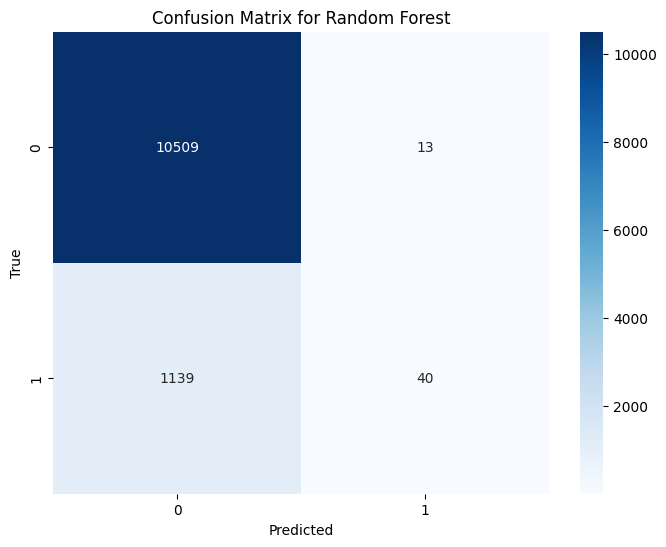

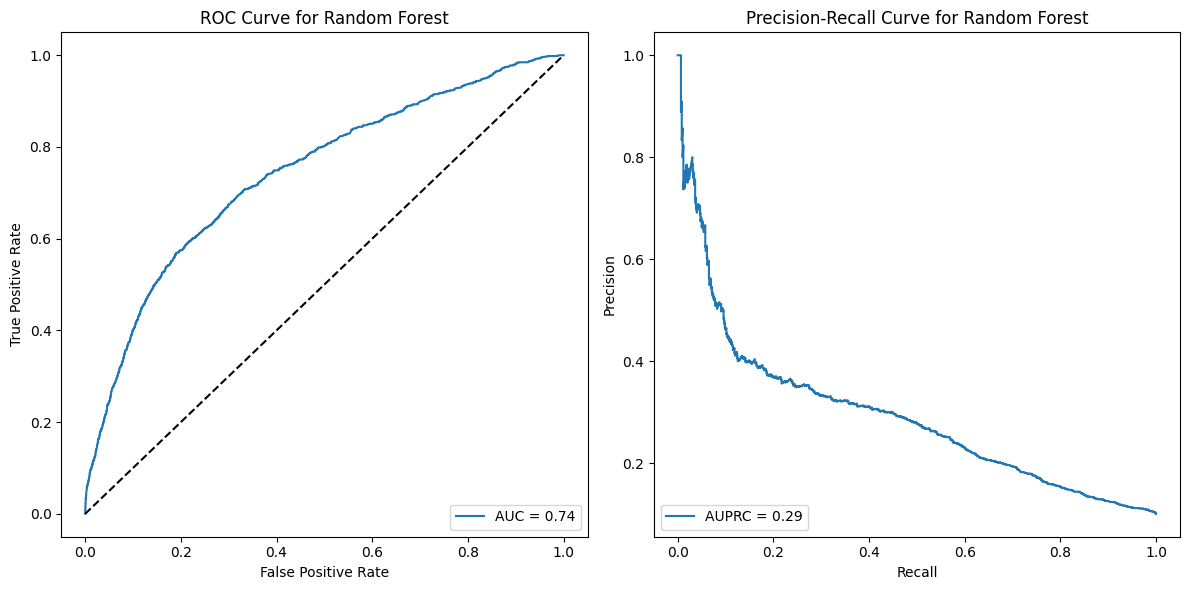

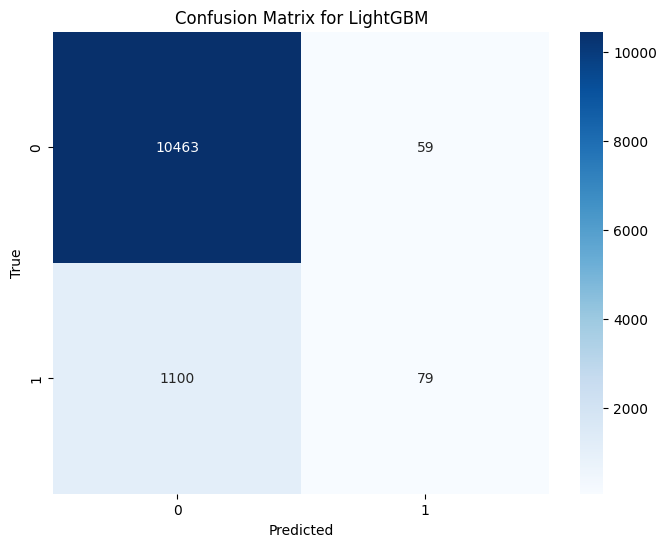

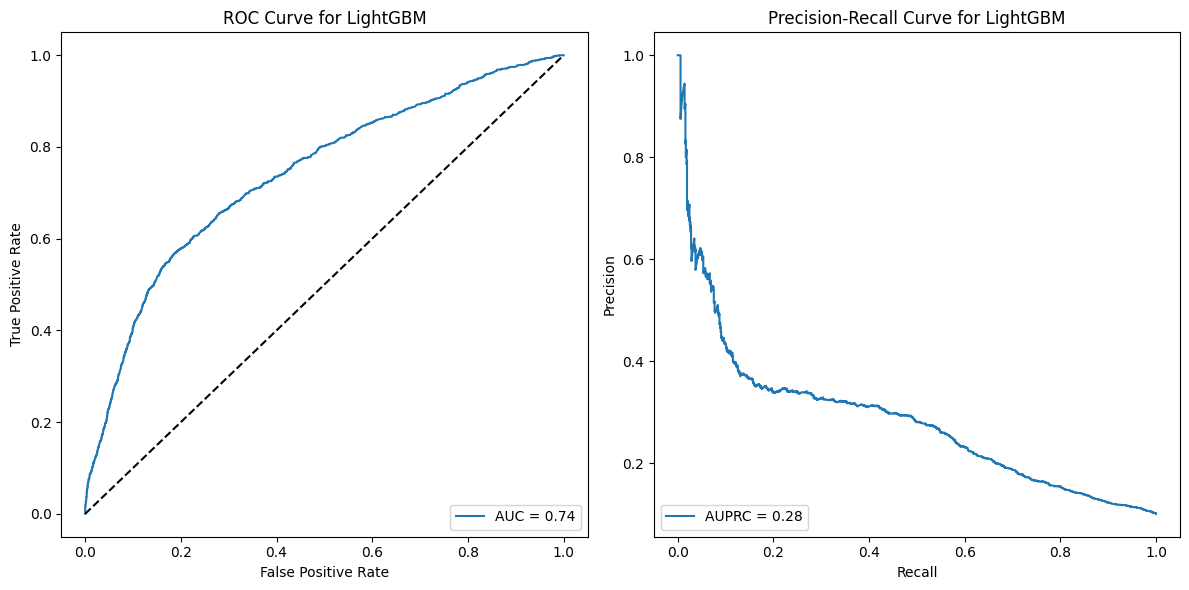

In [5]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

def plot_roc_pr_curves(y_true, y_prob, model_name):
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"ROC Curve for {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    pr_auc = auc(recall, precision)

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f"AUPRC = {pr_auc:.2f}")
    plt.title(f"Precision-Recall Curve for {model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc="lower left")

    plt.tight_layout()
    plt.show()

# Logistic Regression
plot_confusion_matrix(y_test, y_pred_log_reg, "Logistic Regression")
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
plot_roc_pr_curves(y_test, y_prob_log_reg, "Logistic Regression")

# Logistic Regression with LASSO
plot_confusion_matrix(y_test, y_pred_lasso, "Logistic Regression with LASSO")
y_prob_lasso = lasso_cv.best_estimator_.predict_proba(X_test)[:, 1]
plot_roc_pr_curves(y_test, y_prob_lasso, "Logistic Regression with LASSO")

# Random Forest
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
y_prob_rf = rf_cv.best_estimator_.predict_proba(X_test)[:, 1]
plot_roc_pr_curves(y_test, y_prob_rf, "Random Forest")

# LightGBM
plot_confusion_matrix(y_test, y_pred_lgb, "LightGBM")
y_prob_lgb = lgb_cv.best_estimator_.predict_proba(X_test)[:, 1]
plot_roc_pr_curves(y_test, y_prob_lgb, "LightGBM")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00
0:	learn: 0.8989530	test: 0.9012050	best: 0.9012050 (0)	total: 59.4ms	remaining: 59.4s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9026578925
bestIteration = 38

Shrink model to first 39 iterations.
Confusion Matrix (CatBoost):
 [[10500    22]
 [ 1117    62]]
Classification Report (CatBoost):
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     10522
           1       0.74      0.05      0.10      1179

    accuracy                           0.90     11701
   macro avg       0.82      0.53      0.52     11701
weighted avg       0.89      0.90      0.86     11701



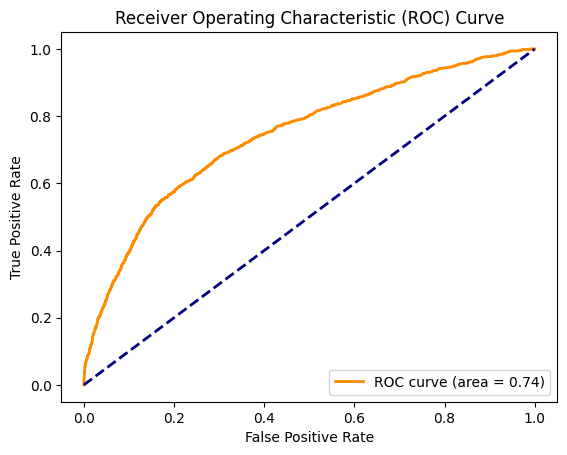

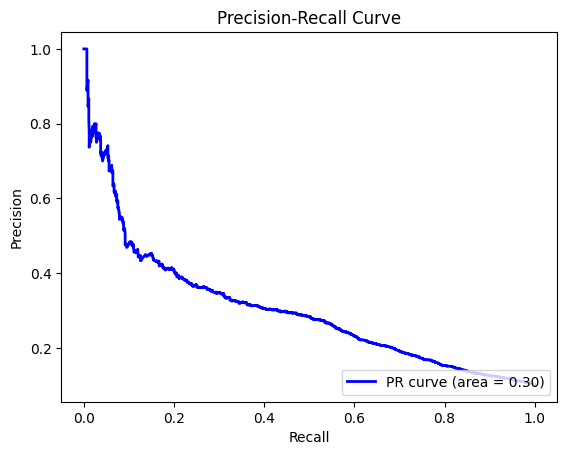

Feature Importances:
 [ 5.54793414  5.37359207  1.41380803  2.15600733  5.19632404  1.06667163
  4.85829198  2.26083072  5.86632025  0.46705583  9.31971055  5.06472014
  3.68365332  1.51405287  3.36766594 37.05106701  0.27002882  5.52226534]


In [13]:
!pip install catboost
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, auc, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# Create CatBoost Pool (optional for better performance)
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test, y_test)

# Initialize CatBoost Classifier
catboost = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    eval_metric='Accuracy',
    random_seed=42,
    verbose=100,  # Display training progress
    use_best_model=True
)

# Train the model
catboost.fit(
    train_pool,
    eval_set=test_pool,
    early_stopping_rounds=50
)

# Make predictions
y_pred_catboost = catboost.predict(X_test)
y_pred_proba_catboost = catboost.predict_proba(X_test)[:, 1]  # For AUC/PR curve calculations

# Confusion Matrix
cm_catboost = confusion_matrix(y_test, y_pred_catboost)
print("Confusion Matrix (CatBoost):\n", cm_catboost)

# Classification Report
print("Classification Report (CatBoost):\n", classification_report(y_test, y_pred_catboost))

# AUC-ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_catboost)
roc_auc = roc_auc_score(y_test, y_pred_proba_catboost)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_catboost)
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Feature Importance
feature_importance = catboost.get_feature_importance()





In [22]:
feature_importance = catboost.get_feature_importance()
# Get all column names from the original data (excluding the target)
all_feature_names = data.drop(columns=[target]).columns

# Create a list to store the feature names based on importance indices
important_feature_names = [all_feature_names[i] for i in range(len(feature_importance))]

# Combine feature names and their importance values into a DataFrame
importance_df = pd.DataFrame({
    'Feature': important_feature_names,  # Use the extracted feature names
    'Importance': feature_importance
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted table
print(importance_df)


                     Feature  Importance
15              DST.result.R   37.051067
10                  Homeless    9.319711
8              Alcohol.abuse    5.866320
0                        Sex    5.547934
17                  new_prev    5.522265
1                        Age    5.373592
4                    hiv_def    5.196324
11                Unemployed    5.064720
6   Has.started.to.take.ART.    4.858292
12         Healthcare.worker    3.683653
14              Smear.result    3.367666
7                 Cavitation    2.260831
3               Localization    2.156007
13                  Prisoner    1.514053
2                Urban.Rural    1.413808
5    Cotrimoxazole.treatment    1.066672
9        Injecting.drug.user    0.467056
16           migrant_refugee    0.270029


Best Parameters for Ridge Regression: {'alpha': 0.01}
Best Cross-Validated Accuracy: 0.8988888888888888
Confusion Matrix (Ridge Regression):
 [[10506    16]
 [ 1136    43]]
Classification Report (Ridge Regression):
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     10522
           1       0.73      0.04      0.07      1179

    accuracy                           0.90     11701
   macro avg       0.82      0.52      0.51     11701
weighted avg       0.88      0.90      0.86     11701



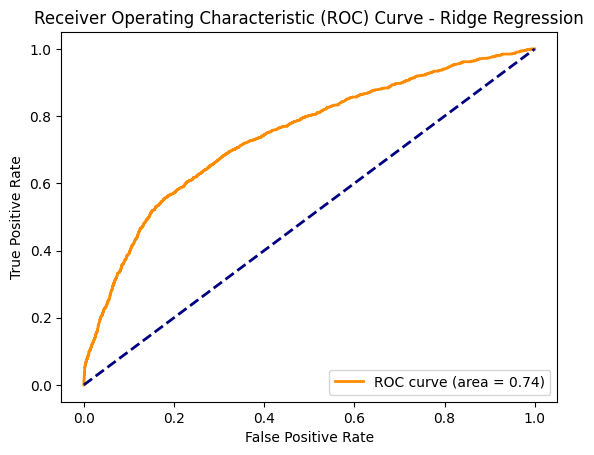

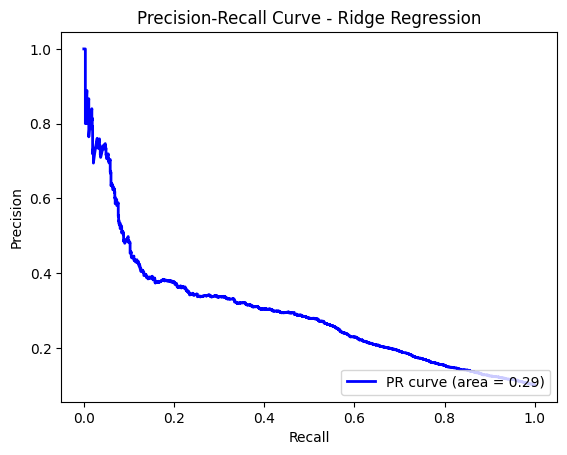

In [8]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Initialize Ridge Classifier
ridge = RidgeClassifier()

# Set up hyperparameter tuning
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Regularization strength
}

# Perform GridSearchCV with 5-fold cross-validation
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='accuracy', n_jobs=-1)
ridge_cv.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for Ridge Regression:", ridge_cv.best_params_)
print("Best Cross-Validated Accuracy:", ridge_cv.best_score_)

# Evaluate the best model on the test set
ridge_best = ridge_cv.best_estimator_
y_pred_ridge = ridge_best.predict(X_test)
y_pred_proba_ridge = ridge_best.decision_function(X_test)  # For AUC and precision-recall

# Confusion Matrix
cm_ridge = confusion_matrix(y_test, y_pred_ridge)
print("Confusion Matrix (Ridge Regression):\n", cm_ridge)

# Classification Report
print("Classification Report (Ridge Regression):\n", classification_report(y_test, y_pred_ridge))

# AUC-ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_ridge)
roc_auc = roc_auc_score(y_test, y_pred_proba_ridge)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Ridge Regression')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_ridge)
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Ridge Regression')
plt.legend(loc="lower right")
plt.show()

In [9]:
# Function to calculate performance metrics
def get_metrics(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel()
    accuracy = (TN + TP) / (TN + FP + FN + TP)
    return {
        "Model_Run": model_name,
        "True_Negatives": TN,
        "False_Positives": FP,
        "False_Negatives": FN,
        "True_Positives": TP,
        "Accuracy": accuracy
    }

# List to store results
results = []

# Logistic Regression
metrics_log_reg = get_metrics(y_test, y_pred_log_reg, "Logistic Regression")
results.append(metrics_log_reg)

# Logistic Regression with LASSO
metrics_lasso = get_metrics(y_test, y_pred_lasso, "Logistic Regression with LASSO")
results.append(metrics_lasso)

# Random Forest
metrics_rf = get_metrics(y_test, y_pred_rf, "Random Forest")
results.append(metrics_rf)

# LightGBM
metrics_lgb = get_metrics(y_test, y_pred_lgb, "LightGBM")
results.append(metrics_lgb)

# Ridge Regression
# Perform Ridge Regression as previously discussed
ridge = RidgeClassifier()
param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='accuracy', n_jobs=-1)
ridge_cv.fit(X_train, y_train)
y_pred_ridge = ridge_cv.best_estimator_.predict(X_test)

metrics_ridge = get_metrics(y_test, y_pred_ridge, "Ridge Regression")
results.append(metrics_ridge)

# CatBoost
# Perform CatBoost as previously discussed
from catboost import CatBoostClassifier, Pool

catboost = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    eval_metric='Accuracy',
    random_seed=42,
    verbose=100,
    use_best_model=True
)

train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test, y_test)
catboost.fit(train_pool, eval_set=test_pool, early_stopping_rounds=50)
y_pred_catboost = catboost.predict(X_test)

metrics_catboost = get_metrics(y_test, y_pred_catboost, "CatBoost")
results.append(metrics_catboost)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the summary table
print(results_df.to_markdown(index=False))


0:	learn: 0.8989530	test: 0.9012050	best: 0.9012050 (0)	total: 16.8ms	remaining: 16.8s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9026578925
bestIteration = 38

Shrink model to first 39 iterations.
| Model_Run                      |   True_Negatives |   False_Positives |   False_Negatives |   True_Positives |   Accuracy |
|:-------------------------------|-----------------:|------------------:|------------------:|-----------------:|-----------:|
| Logistic Regression            |            10490 |                32 |              1109 |               70 |   0.902487 |
| Logistic Regression with LASSO |            10491 |                31 |              1109 |               70 |   0.902572 |
| Random Forest                  |            10509 |                13 |              1139 |               40 |   0.901547 |
| LightGBM                       |            10463 |                59 |              1100 |               79 |   0.900949 |
| Ridge Regression   